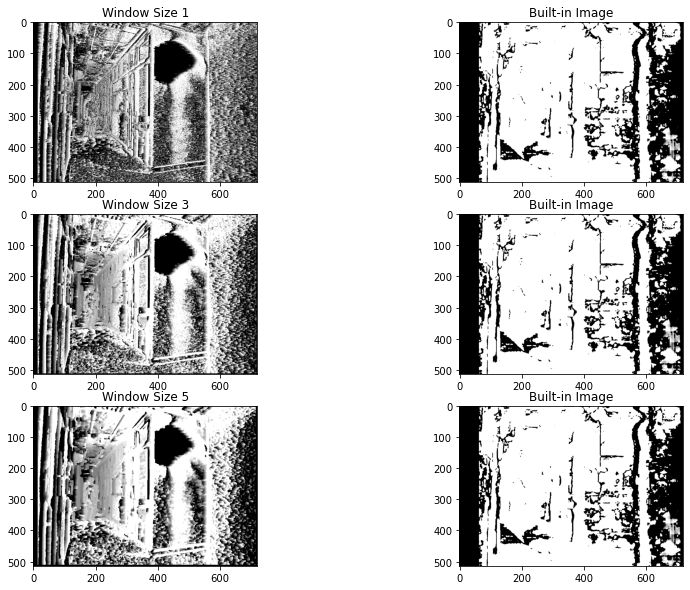

In [2]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function definition disparitySSD
def disparitySSD(leftImg, rightImg, winSize, maxSearchBound):
    
    # Gaussian Blurring for winSize > 1
    if (winSize > 1):
        leftImg = cv2.GaussianBlur(leftImg, (winSize, winSize), 0)
        rightImg = cv2.GaussianBlur(rightImg, (winSize, winSize), 0)

    # Converting image type to double
    leftImg = np.double(leftImg)
    rightImg = np.double(rightImg)
    
    # Initialization of output image
    outImg = np.zeros(leftImg.shape)

    # Left Image pixel matching
    for row in range(leftImg.shape[0] - (winSize - 1)):
        for col in range(leftImg.shape[1] - (winSize - 1)):
            matLeft = leftImg[row:row + winSize, col:col + winSize]
            disparityList = []
            if col - maxSearchBound >= 0:
                # Right Image pixel matching with maxSearchBound at Epipolar Lines
                for disparityRange in range(maxSearchBound):
                    matRight = rightImg[row:row + (winSize), col - disparityRange:col - disparityRange + (winSize)]
                    SD = (matRight - matLeft) ** 2
                    SSD = np.sum(SD)
                    disparityList.append(SSD)
                #print(disparityList)
                minDispVal = min(disparityList)
                dispIndex = disparityList.index(minDispVal) # Storing index of minimum disparity value
                outImg[row, col] = dispIndex
            else:
                pass
            
    # Normalization of pixel values
    outImg = 255 * outImg / maxSearchBound
    #outImg = 255 * outImg / (np.max(outImg))
    
    # Converting image to uint8 to display
    outImg = np.uint8(outImg)
    
    return outImg

# Reading Images
leftImg = cv2.imread('frameLeftgray.png', 0)
rightImg = cv2.imread('frameRightgray.png', 0)
builtinImg = cv2.imread('disparityMap_Matlab.png',0)

# Maximum Search Position on Epipolar Lines
maxSearchBound = 15

# Calling disparitySSD function for window sizes 1, 3, and 5
outImg1 = disparitySSD(leftImg, rightImg, 1, maxSearchBound)
outImg3 = disparitySSD(leftImg, rightImg, 3, maxSearchBound)
outImg5 = disparitySSD(leftImg, rightImg, 5, maxSearchBound)

# Subplots
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(3,2,1)
ax1.set_title('Window Size 1')
ax1.imshow(outImg1, cmap='gray')

ax2 = fig.add_subplot(3,2,2)
ax2.set_title('Built-in Image')
ax2.imshow(builtinImg, cmap='gray')

ax3 = fig.add_subplot(3,2,3)
ax3.set_title('Window Size 3')
ax3.imshow(outImg3, cmap='gray')

ax4 = fig.add_subplot(3,2,4)
ax4.set_title('Built-in Image')
ax4.imshow(builtinImg, cmap='gray')

ax5 = fig.add_subplot(3,2,5)
ax5.set_title('Window Size 5')
ax5.imshow(outImg5, cmap='gray')

ax6 = fig.add_subplot(3,2,6)
ax6.set_title('Built-in Image')
ax6.imshow(builtinImg, cmap='gray')

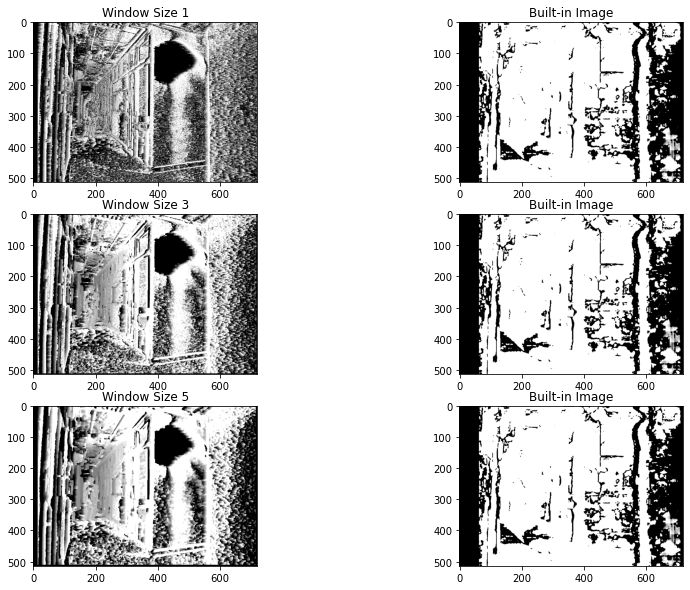

In [17]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function definition disparitySSD
def disparitySSD(leftImg, rightImg, winSize, maxSearchBound):
    
    # Gaussian Blurring for winSize > 1
    if (winSize > 1):
        leftImg = cv2.GaussianBlur(leftImg, (winSize, winSize), 0)
        rightImg = cv2.GaussianBlur(rightImg, (winSize, winSize), 0)

    # Converting image type to double
    leftImg = np.double(leftImg)
    rightImg = np.double(rightImg)
    
    # Initialization of output image
    outImg = np.zeros(leftImg.shape)

    # Left Image pixel matching
    for row in range(leftImg.shape[0] - (winSize - 1)):
        for col in range(leftImg.shape[1] - (winSize - 1)):
            matLeft = leftImg[row:row + winSize, col:col + winSize]
            disparityList = []
            if col - maxSearchBound >= 0:
                # Right Image pixel matching with maxSearchBound at Epipolar lines
                for disparityRange in range(maxSearchBound):
                    matRight = rightImg[row:row + (winSize), col - disparityRange:col - disparityRange + (winSize)]
                    SD = (matRight - matLeft) ** 2
                    SSD = np.sum(SD)
                    disparityList.append(SSD)
                minDispVal = min(disparityList)
                dispIndex = disparityList.index(minDispVal) # Storing index of minimum disparity value
                outImg[row, col] = dispIndex
            else:
                pass

    #outImg = 255 * outImg / maxSearchBound
    outImg = 255 * outImg / (np.max(outImg))
    outImg = np.uint8(outImg)
    return outImg

# Reading Images
leftImg = cv2.imread('frameLeftgray.png', 0)
rightImg = cv2.imread('frameRightgray.png', 0)
builtinImg = cv2.imread('disparityMap_Matlab.png',0)

maxSearchBound = 15

# Calling disparitySSD function for window sizes 1, 3, and 5
outImg1 = disparitySSD(leftImg, rightImg, 1, maxSearchBound)
outImg3 = disparitySSD(leftImg, rightImg, 3, maxSearchBound)
outImg5 = disparitySSD(leftImg, rightImg, 5, maxSearchBound)

fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(3,2,1)
ax1.set_title('Window Size 1')
ax1.imshow(outImg1, cmap='gray')

ax2 = fig.add_subplot(3,2,2)
ax2.set_title('Built-in Image')
ax2.imshow(builtinImg, cmap='gray')

ax3 = fig.add_subplot(3,2,3)
ax3.set_title('Window Size 3')
ax3.imshow(outImg3, cmap='gray')

ax4 = fig.add_subplot(3,2,4)
ax4.set_title('Built-in Image')
ax4.imshow(builtinImg, cmap='gray')

ax5 = fig.add_subplot(3,2,5)
ax5.set_title('Window Size 5')
ax5.imshow(outImg5, cmap='gray')

ax6 = fig.add_subplot(3,2,6)
ax6.set_title('Built-in Image')
ax6.imshow(builtinImg, cmap='gray')